In [2]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [3]:
os.chdir(r'C:\Users\fizzza\Desktop\data mining')
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'sample_submission.csv')

In [4]:
train.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,reorder_mean_product,reorder_mean_user,number of orders,reordered_cnt_per_id,reordered_frquency_per_id
0,2,33120,1,1,86,16,202279,3,5,9,8.0,0.741117,0.666667,9,6,0.666667
1,2,28985,2,1,83,4,202279,3,5,9,8.0,0.688312,0.666667,9,6,0.666667
2,2,9327,3,0,104,13,202279,3,5,9,8.0,0.244444,0.666667,9,6,0.666667
3,2,45918,4,1,19,13,202279,3,5,9,8.0,0.500000,0.666667,9,6,0.666667
4,2,30035,5,0,17,13,202279,3,5,9,8.0,0.375000,0.666667,9,6,0.666667


In [5]:
test.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
X = train.drop(['reordered'],axis=1)
Y = train['reordered']

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

In [9]:
lr =LogisticRegression(penalty = 'l1', C = 10000, solver = 'liblinear')
lr.fit(X_train,Y_train)
y_predict = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1]
accuracy_score(Y_test,y_predict)

0.8312

In [10]:
y2_predict = lr.predict(X_train)
accuracy_score(Y_train,y2_predict)

0.8319571428571428

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_predict))
print(classification_report(Y_test,y_predict))

[[28112  8829]
 [ 6363 46696]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79     36941
           1       0.84      0.88      0.86     53059

    accuracy                           0.83     90000
   macro avg       0.83      0.82      0.82     90000
weighted avg       0.83      0.83      0.83     90000



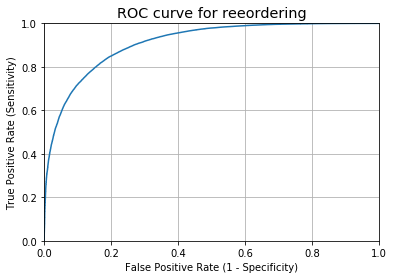

In [12]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for reeordering')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [13]:
metrics.roc_auc_score(Y_test, y_pred_prob)

0.9103596340930495

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

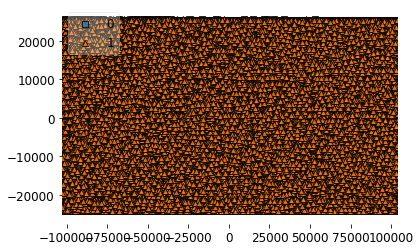

In [26]:
from sklearn.decomposition import PCA
#from mlxtend.plotting import plot_decision_region
pca = PCA(n_components = 2)
X = X_train.to_numpy()
Y = Y_train.to_numpy()
X_train2 = pca.fit_transform(X)
lr.fit(X_train2, Y_train)
plot_decision_regions(X_train2, Y, clf=lr, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
